# Librerias basicas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

Importar el archivo

In [2]:
path = "weatherAUS.csv"
dataframe = pd.read_csv(path, usecols=range(1,25))
dataframe.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


25 Columnas

**Date** fecha de la observacion

**MinTemp** Temperatura minima. En grados celsius

**MaxTemp** Temperatura maxima. En grados celsius

**Rainfall** cantidad de lluvia registrada en el dia. En mm

**Evaporation** evaporacion (mm) de 00 a 09am.

**Sunshine** Numero de horas de luz solar durante el dia.

**WindGustDir** direccion de la rafaga de viento mas fuerte en las 24 horas

**WindGustSpeed** velocidad de la rafaga de viento mas fuerte en km/h

**WindDir9am** direccion del viento a las 9 am

**WindDir3pm** direccion del viento a las 3 pm

**WindSpeed9am** velocidad del viento en km/h, a las 9 am

**WindSpeed3pm** velocidad del viento en km/h, a las 3 pm

**Humidity9am** humedad en porcentaje a las 9 am

**Humidity3pm** humedad en porcentaje a las 3 pm

**Pressure9am** presion atmosferica en (hpa) al nivel del mar a las 9 am

**Pressure9am** presion atmosferica en (hpa) al nivel del mar a las 3 pm

**Cloud9am** Fraccion del cielo oscurecida por nubes medida en fracciones de 8 (0 indica sin nubes, 8 totalmente nublado) a las 9 am

**Cloud9am** Fraccion del cielo oscurecida por nubes medida en fracciones de 8 (0 indica sin nubes, 8 totalmente nublado) a las 3pm

**Temp9am** temperatura en grados celsius a las 9 am

**Temp3pm** temperatura en grados celsius a las 3 pm

**RainToday** valor booleano si llovio o no durante el dia (1 si pasa 1 mm)

**RainTomorrow** Cantidad de lluvia al dia siguiente en mm

**RainfallTomorrow** cantidad de lluvia al dia siguiente en mm

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              145412 non-null  object 
 1   Location          145412 non-null  object 
 2   MinTemp           143928 non-null  float64
 3   MaxTemp           144159 non-null  float64
 4   Rainfall          142152 non-null  float64
 5   Evaporation       82658 non-null   float64
 6   Sunshine          75616 non-null   float64
 7   WindGustDir       135096 non-null  object 
 8   WindGustSpeed     135159 non-null  float64
 9   WindDir9am        134850 non-null  object 
 10  WindDir3pm        141186 non-null  object 
 11  WindSpeed9am      143645 non-null  float64
 12  WindSpeed3pm      142351 non-null  float64
 13  Humidity9am       142759 non-null  float64
 14  Humidity3pm       140907 non-null  float64
 15  Pressure9am       130351 non-null  float64
 16  Pressure3pm       13

Seleccionar las lucalizaciones Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport.
descartar el resto

In [4]:
dataframe['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [5]:
costa_este = ["Adelaide", "Canberra", "Cobar", "Dartmoor", "Melbourne", "MelbourneAirport", "MountGambier", "Sydney", "SydneyAirport"]

dataframe.loc[dataframe['Location'].isin(costa_este), 'Location'] = 'costa_este'

dataframe = dataframe[dataframe['Location'] == 'costa_este']

dataframe = dataframe.reset_index(drop=True)

In [6]:
dataframe.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2009-01-01,costa_este,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
1,2009-01-02,costa_este,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
2,2009-01-03,costa_este,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
3,2009-01-04,costa_este,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
4,2009-01-05,costa_este,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0


Como se pueden considerar todas las localizaciones como una descarto la columna de las localizaciones tanto la de las fechas que tampoco voy a usar

In [7]:
dataframe = dataframe.drop('Location', axis=1)
dataframe = dataframe.drop('Date', axis=1)
dataframe = dataframe.drop('WindGustDir', axis=1)
dataframe = dataframe.drop('WindDir9am', axis=1)
dataframe = dataframe.drop('WindDir3pm', axis=1)

# Codear Las columnas que tienen el tipo object, que son todas de direccion de viento y raintoday,
raintomorrow se deja para la parte de clasificacion

En un momento se iba a codear la variable de las direcciones de viento pero verlas en el mapa de calor muestra que apenas tienen correlacion con el resto de variables por lo que las descarto

In [8]:
#coord = {
#    'N': 0, 'E': 90, 'S': 180, 'W': 270,
#    'WNW': 292.5, 'WSW': 247.5, 'NE': 45,
#    'NNW': 337.5, 'NNE': 22.5, 'SW': 225,
#    'ENE': 67.5, 'SSE': 157.5, 'NW': 315,
#    'SE': 135, 'ESE': 112.5, 'SSW': 202.5
#}
#
#dataframe['WindGustDir'] = dataframe['WindGustDir'].map(coord)
#dataframe['WindDir9am'] = dataframe['WindDir9am'].map(coord)
#dataframe['WindDir3pm'] = dataframe['WindDir3pm'].map(coord)

In [9]:
dataframe['RainToday'].replace({'Yes':1, 'No': 0}, inplace=True)

In [10]:
dataframe.isnull().sum()

MinTemp              570
MaxTemp              558
Rainfall             986
Evaporation         4353
Sunshine            6713
WindGustSpeed       1642
WindSpeed9am         358
WindSpeed3pm         340
Humidity9am          940
Humidity3pm          890
Pressure9am          839
Pressure3pm          829
Cloud9am            9367
Cloud3pm            9550
Temp9am              585
Temp3pm              576
RainToday            986
RainTomorrow         985
RainfallTomorrow     985
dtype: int64

# Hacer split de los datos

In [11]:
x_reg = dataframe.drop(columns=['RainTomorrow','RainfallTomorrow'])
y_reg = dataframe['RainfallTomorrow']

x_clas = x_reg
y_clas = dataframe['RainTomorrow']

In [12]:
from sklearn.model_selection import train_test_split

### Regresion

In [13]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg,y_reg, test_size=0.25, random_state=42)

In [14]:
dataframe_regresion = pd.concat([x_train_reg, y_train_reg], axis=1)
dataframe_test_regresion = pd.concat([x_test_reg, y_test_reg], axis=1)


In [15]:
dataframe_regresion = dataframe_regresion.reset_index(drop=True)
dataframe_test_regresion = dataframe_test_regresion.reset_index(drop=True)
dataframe_regresion.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainfallTomorrow
0,11.0,19.3,0.0,3.6,9.1,41.0,19.0,22.0,76.0,62.0,1024.3,1022.9,3.0,5.0,16.3,18.7,0.0,0.0
1,7.6,22.3,0.0,NaN,NaN,46.0,17.0,30.0,60.0,47.0,1015.7,1014.9,NaN,6.0,13.5,20.2,0.0,0.0
2,0.0,13.1,0.0,1.4,8.3,24.0,15.0,9.0,75.0,43.0,1034.1,1031.6,0.0,5.0,3.9,12.6,0.0,0.0
3,13.5,23.4,0.0,25.6,NaN,44.0,11.0,17.0,47.0,41.0,1018.6,1016.4,NaN,NaN,17.3,21.9,0.0,0.0
4,9.3,16.4,2.0,4.4,5.6,24.0,13.0,9.0,68.0,53.0,991.8,993.1,7.0,6.0,11.9,15.6,1.0,1.6


### clasificacion

In [16]:
x_train_clas, x_test_clas, y_train_clas, y_test_clas = train_test_split(x_clas,y_clas, test_size=0.25, random_state=86)

In [17]:
dataframe_clasifacion = pd.concat([x_train_clas, y_train_clas], axis=1)
dataframe_test_clasificacion = pd.concat([x_test_clas, y_test_clas], axis=1)

In [18]:
dataframe_clasifacion = dataframe_clasifacion.reset_index(drop=True)
dataframe_test_clasificacion = dataframe_test_clasificacion.reset_index(drop=True)
dataframe_clasifacion.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.4,18.1,0.0,1.4,7.4,37.0,6.0,22.0,83.0,45.0,1029.6,1026.9,7.0,7.0,9.8,17.2,0.0,No
1,3.7,21.4,0.0,0.6,12.7,41.0,20.0,19.0,79.0,49.0,1026.2,1021.9,1.0,1.0,12.4,20.3,0.0,No
2,10.7,16.4,0.0,1.2,4.7,19.0,4.0,6.0,91.0,55.0,1020.7,1018.2,7.0,7.0,11.7,16.0,0.0,No
3,13.4,19.1,0.0,1.4,0.7,26.0,11.0,0.0,69.0,70.0,1034.6,1031.5,7.0,6.0,14.8,16.8,0.0,No
4,16.5,24.1,0.0,9.0,3.9,61.0,24.0,24.0,60.0,93.0,1006.5,1003.9,7.0,8.0,18.2,15.9,0.0,Yes


# completar datos faltantes

In [19]:
dataframe_regresion.isnull().sum()


MinTemp              422
MaxTemp              411
Rainfall             736
Evaporation         3247
Sunshine            5032
WindGustSpeed       1221
WindSpeed9am         266
WindSpeed3pm         252
Humidity9am          691
Humidity3pm          653
Pressure9am          629
Pressure3pm          618
Cloud9am            7020
Cloud3pm            7149
Temp9am              434
Temp3pm              426
RainToday            736
RainfallTomorrow     732
dtype: int64

Dropeo los faltantes de Rainfall tomorrow ya que es una cantidad menor al 5% de los datos faltantes

In [20]:
valores_rainfall_tomorrow = dataframe_regresion['RainfallTomorrow'].isnull().sum()
totales = dataframe_regresion['RainfallTomorrow'].value_counts().sum()

print(valores_rainfall_tomorrow, totales)

print(732/20442)

732 20442
0.035808629292632815


In [21]:
dataframe_regresion.isnull().sum()

MinTemp              422
MaxTemp              411
Rainfall             736
Evaporation         3247
Sunshine            5032
WindGustSpeed       1221
WindSpeed9am         266
WindSpeed3pm         252
Humidity9am          691
Humidity3pm          653
Pressure9am          629
Pressure3pm          618
Cloud9am            7020
Cloud3pm            7149
Temp9am              434
Temp3pm              426
RainToday            736
RainfallTomorrow     732
dtype: int64

# Min Max TEMP

Min temp se remplaza por la media, max temp por la mediana ya que se ve mas afectada por valores altos, los cuales arrastran la media

In [22]:
dataframe_regresion['MinTemp'].describe(), dataframe_regresion['MaxTemp'].describe()

(count    20752.000000
 mean        11.236782
 std          5.685086
 min         -8.000000
 25%          7.400000
 50%         10.900000
 75%         15.100000
 max         33.900000
 Name: MinTemp, dtype: float64,
 count    20763.000000
 mean        21.887588
 std          6.672559
 min          7.000000
 25%         16.600000
 50%         21.000000
 75%         26.100000
 max         46.800000
 Name: MaxTemp, dtype: float64)

<Axes: >

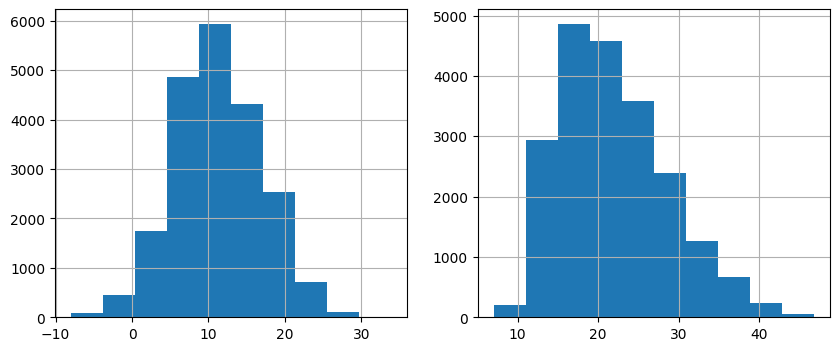

In [23]:
plt.figure(figsize=(10,4))

plt.subplot(121)
dataframe_regresion['MinTemp'].hist(bins=10)
plt.subplot(122)
dataframe_regresion['MaxTemp'].hist(bins=10)

In [24]:
imputer_min_temp = SimpleImputer(strategy='median', fill_value=0)
imputer_max_temp = SimpleImputer(strategy='mean', fill_value=0)
columna_mintemp = imputer_min_temp.fit_transform(dataframe_regresion[['MinTemp']])
columna_maxtemp = imputer_max_temp.fit_transform(dataframe_regresion[['MaxTemp']])
dataframe_regresion['MinTemp'] = columna_mintemp
dataframe_regresion['MaxTemp'] = columna_maxtemp

# Rainfall

Se reemplaza por 0 (asumo que la mayoria de dias no llueve)

<Axes: >

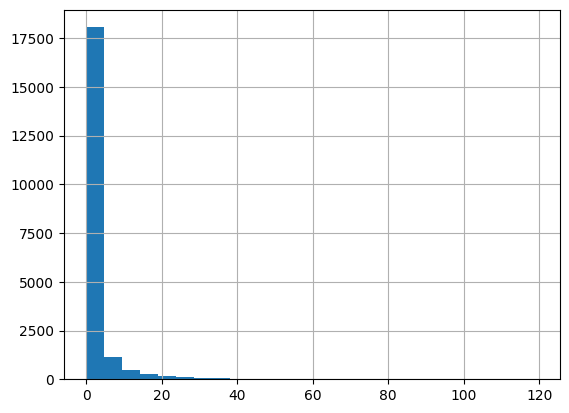

In [25]:
dataframe_regresion['Rainfall'].hist(bins=25)

In [26]:
imputer_rainfall = SimpleImputer(strategy='constant', fill_value=0)
columna_rainfall = imputer_rainfall.fit_transform(dataframe_regresion[['Rainfall']])
dataframe_regresion['Rainfall'] = columna_rainfall

# Evaporacion



In [27]:
dataframe_regresion['Evaporation'].describe()

count    17927.000000
mean         4.818408
std          3.631429
min          0.000000
25%          2.200000
50%          4.000000
75%          6.600000
max         65.800000
Name: Evaporation, dtype: float64

<Axes: >

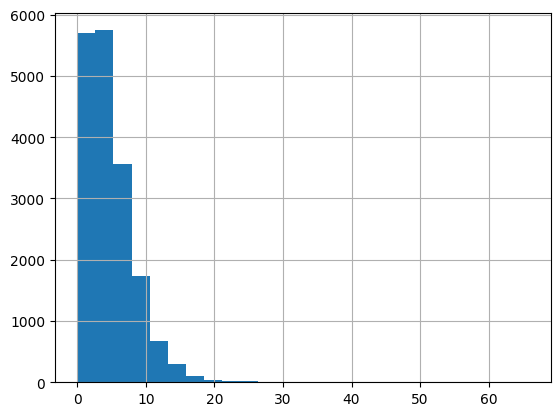

In [28]:
dataframe_regresion['Evaporation'].hist(bins=25)

In [29]:
imputer_evaporation = SimpleImputer(strategy='mean', fill_value=0)
columna_evaporacion = imputer_evaporation.fit_transform(dataframe_regresion[['Evaporation']])
dataframe_regresion['Evaporation'] = columna_evaporacion

<Axes: >

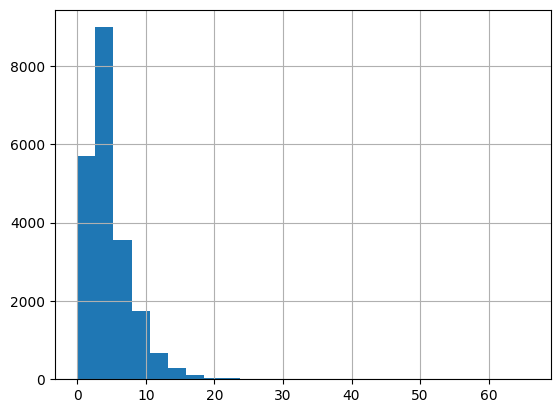

In [30]:
dataframe_regresion['Evaporation'].hist(bins=25)

<Axes: >

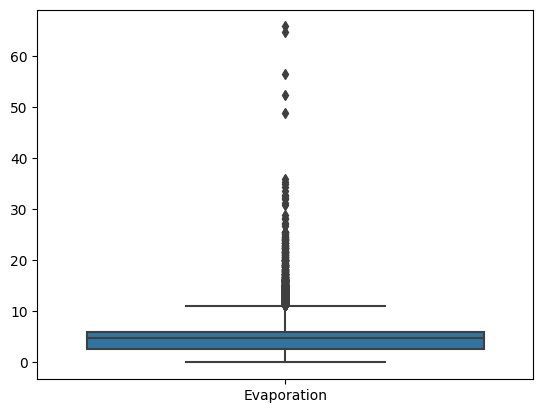

In [31]:
sns.boxplot(dataframe_regresion[['Evaporation']])

# Sunshine

sunshine por la media, ya que esta mas cerca al dato oficial de que hay 6,3 horas de sol por dia en Australia 

In [32]:
dataframe_regresion['Sunshine'].describe()

count    16142.000000
mean         6.893452
std          3.862787
min          0.000000
25%          3.800000
50%          7.400000
75%         10.000000
max         14.300000
Name: Sunshine, dtype: float64

<Axes: >

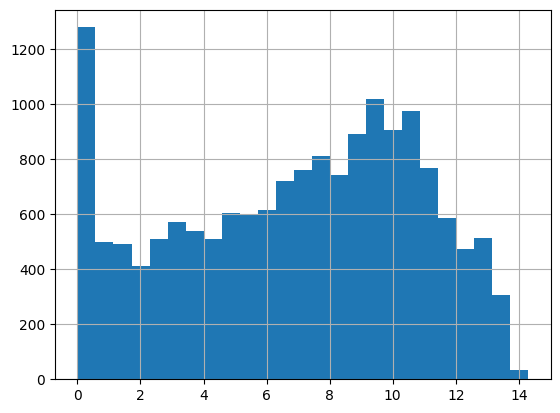

In [33]:
dataframe_regresion['Sunshine'].hist(bins=25)

In [34]:
imputer_sunshine = SimpleImputer(strategy='mean')
columna_sunshine = imputer_sunshine.fit_transform(dataframe_regresion[['Sunshine']])
dataframe_regresion['Sunshine'] = columna_evaporacion


<Axes: >

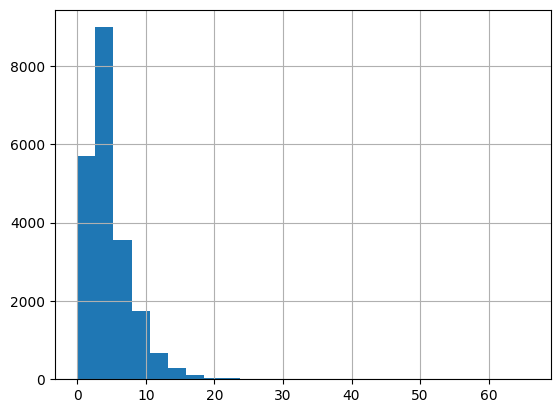

In [35]:
dataframe_regresion['Sunshine'].hist(bins=25)

# WindGustSpeed

<Axes: >

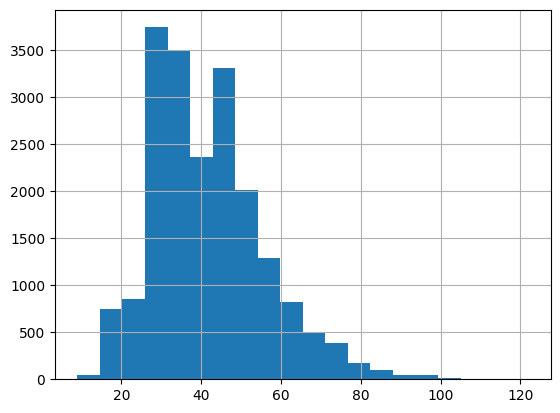

In [36]:
dataframe_regresion['WindGustSpeed'].hist(bins=20)

In [37]:
imputer_WindGustSpeed = SimpleImputer(strategy='mean')
columna_WindGustSpeed = imputer_WindGustSpeed.fit_transform(dataframe_regresion[['WindGustSpeed']])
dataframe_regresion['WindGustSpeed'] = columna_WindGustSpeed

<Axes: >

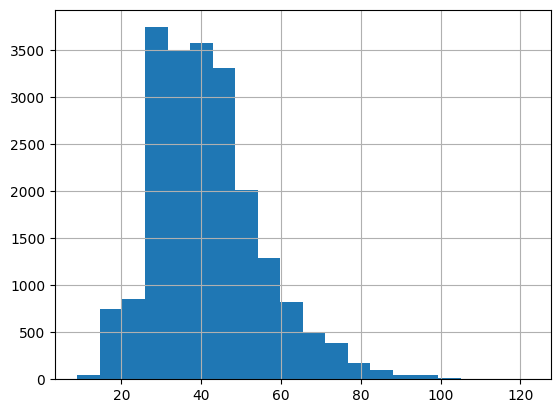

In [38]:
dataframe_regresion['WindGustSpeed'].hist(bins=20)

# WindSpeed 9am y 3pm

<Axes: >

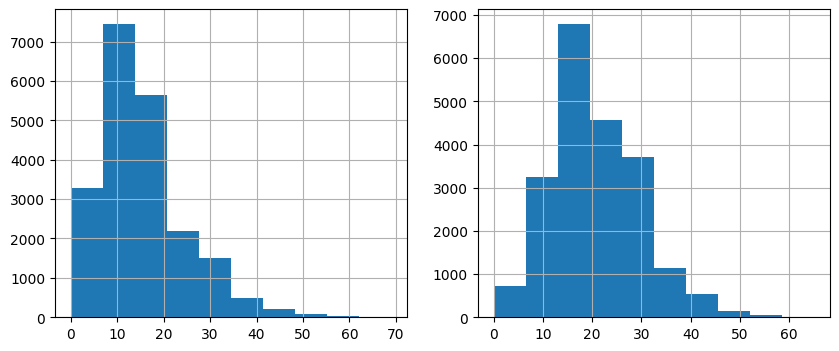

In [39]:
plt.figure(figsize=(10,4))

plt.subplot(121)
dataframe_regresion['WindSpeed9am'].hist(bins=10)
plt.subplot(122)
dataframe_regresion['WindSpeed3pm'].hist(bins=10)

In [40]:
imputer_wind = SimpleImputer(strategy='mean')

columna_wind_speed9am = imputer_wind.fit_transform(dataframe_regresion[['WindSpeed9am']])
columna_wind_speed3pm = imputer_wind.fit_transform(dataframe_regresion[['WindSpeed3pm']])

dataframe_regresion['WindSpeed9am'] = columna_wind_speed9am
dataframe_regresion['WindSpeed3pm'] = columna_wind_speed3pm

# Humidity

<Axes: >

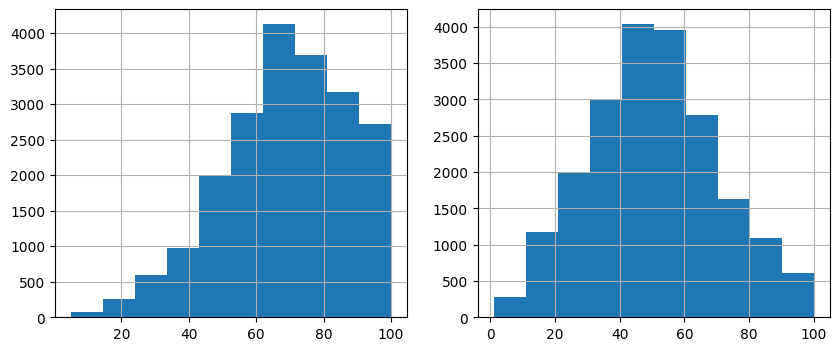

In [41]:
plt.figure(figsize=(10,4))

plt.subplot(121)
dataframe_regresion['Humidity9am'].hist(bins=10)
plt.subplot(122)
dataframe_regresion['Humidity3pm'].hist(bins=10)

In [42]:
imputer_humidity = SimpleImputer(strategy='median')

columna_humidity_9am = imputer_humidity.fit_transform(dataframe_regresion[['Humidity9am']])
columna_humidity_3pm = imputer_humidity.fit_transform(dataframe_regresion[['Humidity3pm']])

dataframe_regresion['Humidity9am'] = columna_humidity_9am
dataframe_regresion['Humidity3pm'] = columna_humidity_3pm

# Pressure

<Axes: >

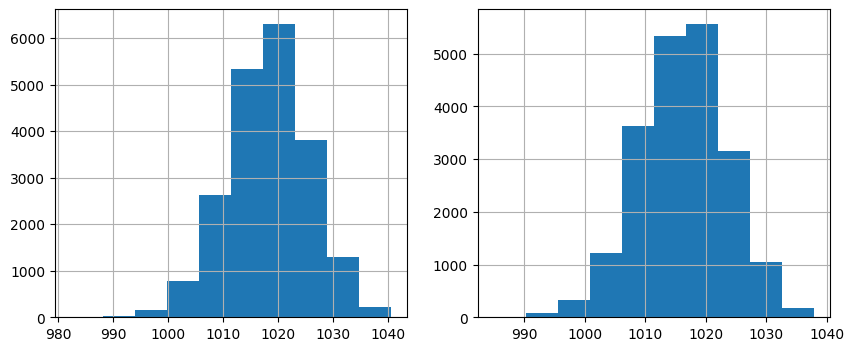

In [43]:
plt.figure(figsize=(10,4))

plt.subplot(121)
dataframe_regresion['Pressure9am'].hist(bins=10)
plt.subplot(122)
dataframe_regresion['Pressure3pm'].hist(bins=10)

In [44]:
imputer_pressure = SimpleImputer(strategy='median')

columna_pressure_9am = imputer_humidity.fit_transform(dataframe_regresion[['Pressure9am']])
columna_pressure_3pm = imputer_humidity.fit_transform(dataframe_regresion[['Pressure3pm']])

dataframe_regresion['Pressure9am'] = columna_pressure_9am
dataframe_regresion['Pressure3pm'] = columna_pressure_3pm

<Axes: >

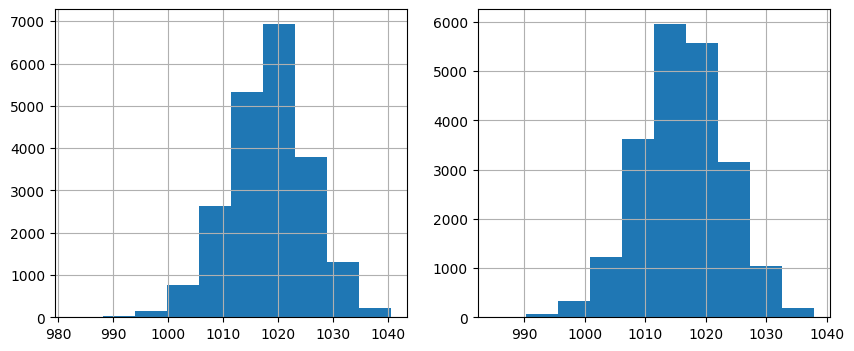

In [45]:
plt.figure(figsize=(10,4))

plt.subplot(121)
dataframe_regresion['Pressure9am'].hist(bins=10)
plt.subplot(122)
dataframe_regresion['Pressure3pm'].hist(bins=10)

# Clouds

<Axes: >

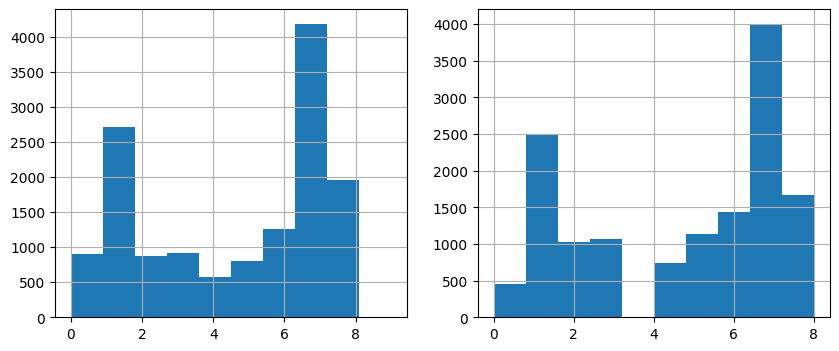

In [46]:
plt.figure(figsize=(10,4))

plt.subplot(121)
dataframe_regresion['Cloud9am'].hist(bins=10)
plt.subplot(122)
dataframe_regresion['Cloud3pm'].hist(bins=10)

In [47]:
imputer_clouds = SimpleImputer(strategy='median')

columna_cloud9am = imputer_clouds.fit_transform(dataframe_regresion[['Cloud9am']])
columna_cloud3pm = imputer_clouds.fit_transform(dataframe_regresion[['Cloud3pm']])

dataframe_regresion['Cloud9am'] = columna_cloud9am
dataframe_regresion['Cloud3pm'] = columna_cloud3pm

# Temp9am y Temp3pm

<Axes: >

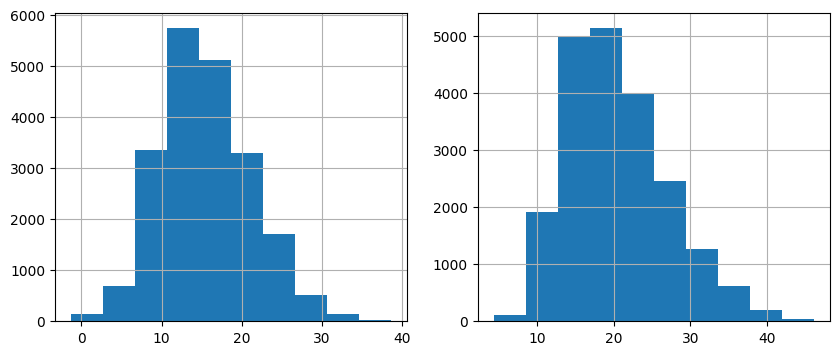

In [48]:
plt.figure(figsize=(10,4))

plt.subplot(121)
dataframe_regresion['Temp9am'].hist(bins=10)
plt.subplot(122)
dataframe_regresion['Temp3pm'].hist(bins=10)

In [49]:
imputer_temp = SimpleImputer(strategy='mean')

columna_temp9am = imputer_clouds.fit_transform(dataframe_regresion[['Temp9am']])
columna_temp3pm = imputer_clouds.fit_transform(dataframe_regresion[['Temp3pm']])

dataframe_regresion['Temp9am'] = columna_temp9am
dataframe_regresion['Temp3pm'] = columna_temp3pm

# Rain Today

<Axes: >

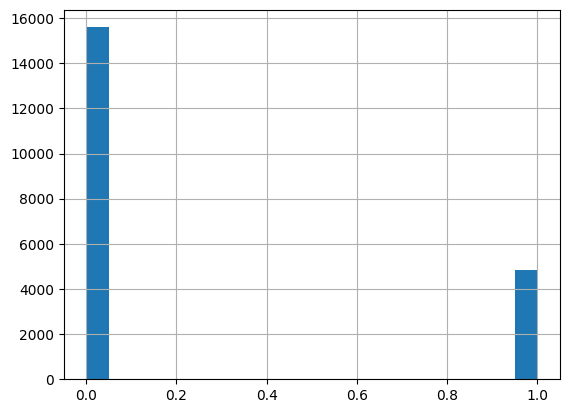

In [50]:
dataframe_regresion['RainToday'].hist(bins=20)

In [51]:
imputer_rain_today = SimpleImputer(strategy='constant', fill_value=0)
columna_rain_today = imputer_rain_today.fit_transform(dataframe_regresion[['RainToday']])
dataframe_regresion['RainToday'] = columna_rain_today

# Rain Tomorrow 


son pocos asi que se descartan

In [52]:
dataframe_regresion = dataframe_regresion.dropna(subset=['RainfallTomorrow'])

# Llenar los datasets de train

In [53]:
dataframe_test_regresion.isnull().sum()

MinTemp              148
MaxTemp              147
Rainfall             250
Evaporation         1106
Sunshine            1681
WindGustSpeed        421
WindSpeed9am          92
WindSpeed3pm          88
Humidity9am          249
Humidity3pm          237
Pressure9am          210
Pressure3pm          211
Cloud9am            2347
Cloud3pm            2401
Temp9am              151
Temp3pm              150
RainToday            250
RainfallTomorrow     253
dtype: int64

In [54]:
columnas_media = ["MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Temp9am", "Temp3pm"]
columnas_mediana = [ "MinTemp", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm"]
columnas_zero = ["Rainfall", "RainToday"]

In [55]:
media_regresion = dataframe_regresion[columnas_media].mean()
mediana_regresion = dataframe_regresion[columnas_mediana].median()

In [56]:
dataframe_test_regresion[columnas_media] = dataframe_test_regresion[columnas_media].fillna(media_regresion)

In [57]:
dataframe_test_regresion[columnas_mediana] = dataframe_test_regresion[columnas_mediana].fillna(mediana_regresion)

In [58]:
dataframe_test_regresion['Rainfall'] = dataframe_test_regresion['Rainfall'].fillna(0)
dataframe_test_regresion['RainToday']= dataframe_test_regresion['RainToday'].fillna(0)

In [59]:
dataframe_test_regresion = dataframe_test_regresion.dropna(subset=['RainfallTomorrow'])

In [60]:
dataframe_test_regresion.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainfallTomorrow    0
dtype: int64

In [61]:
dataframe_regresion_X = dataframe_regresion.iloc[:, :-1]
dataframe_regresion_Y = dataframe_regresion.iloc[:,-1]

dataframe_test_regresion_X = dataframe_test_regresion.iloc[:, :-1]
dataframe_test_regresion_Y = dataframe_test_regresion.iloc[:,-1]

# Scatterplot

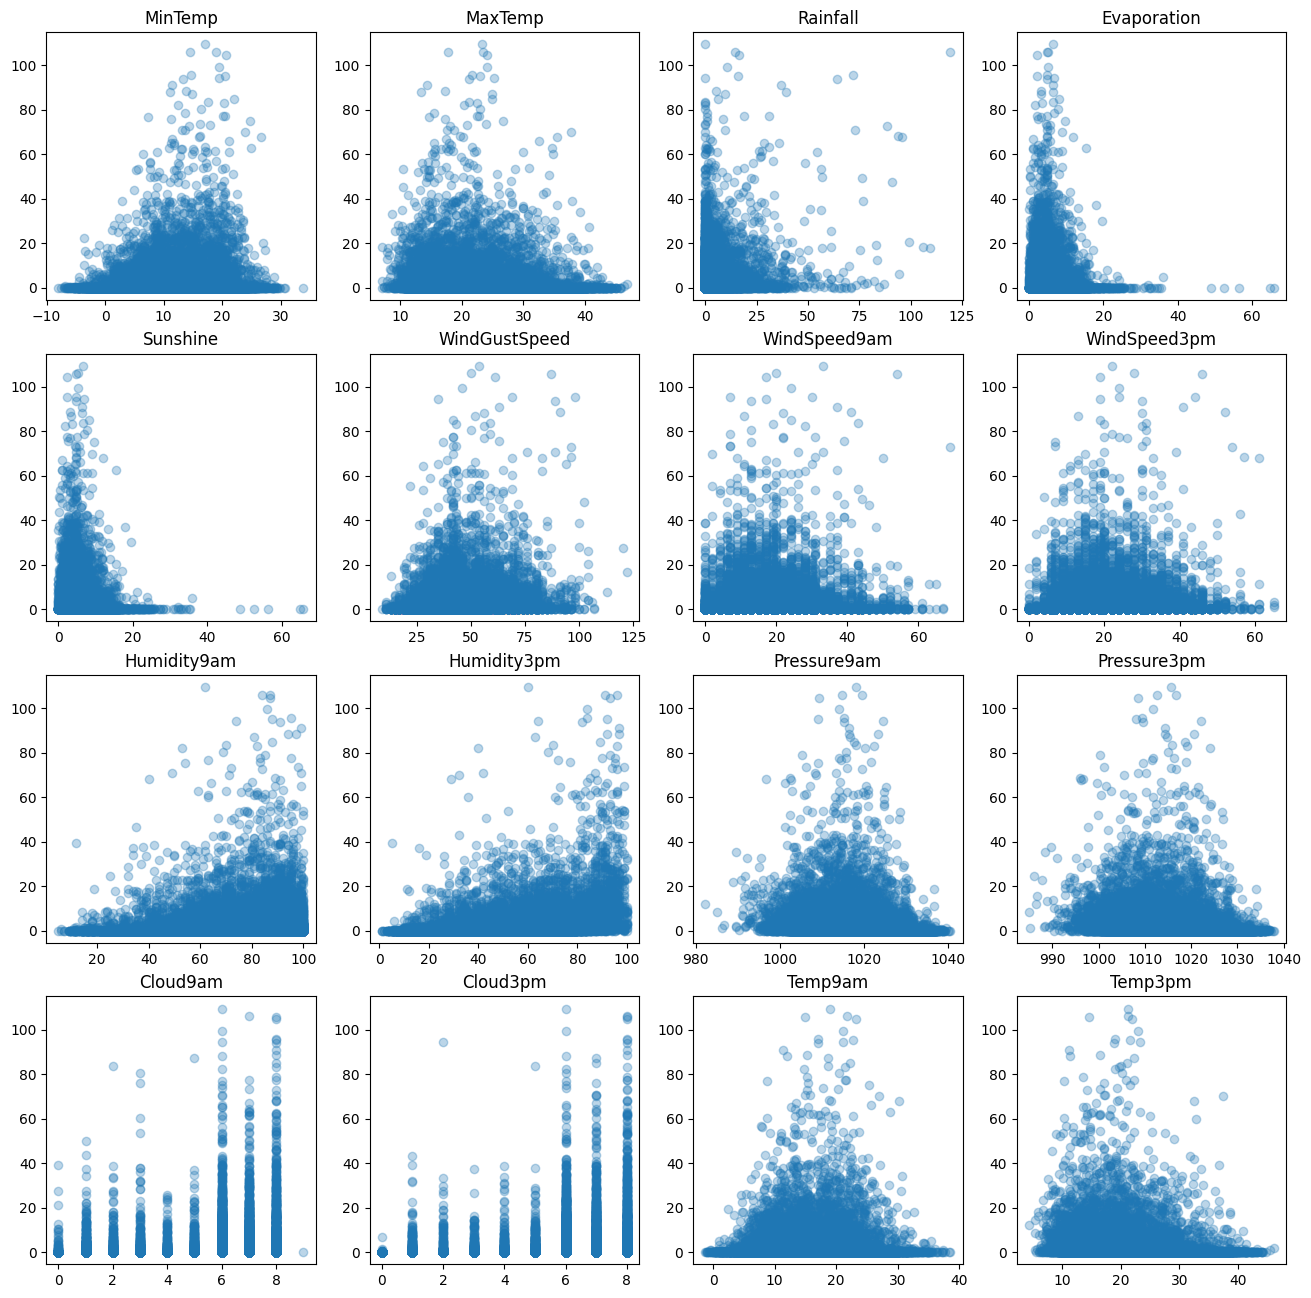

In [62]:
plt.figure(figsize=(16, 16))

for idx, col in enumerate(dataframe_regresion.columns[:16], start=1):  
    plt.subplot(4, 4, idx)
    plt.scatter(data=dataframe_regresion, x=col, y='RainfallTomorrow', alpha=.3)
    plt.title(col)

# Heatmap

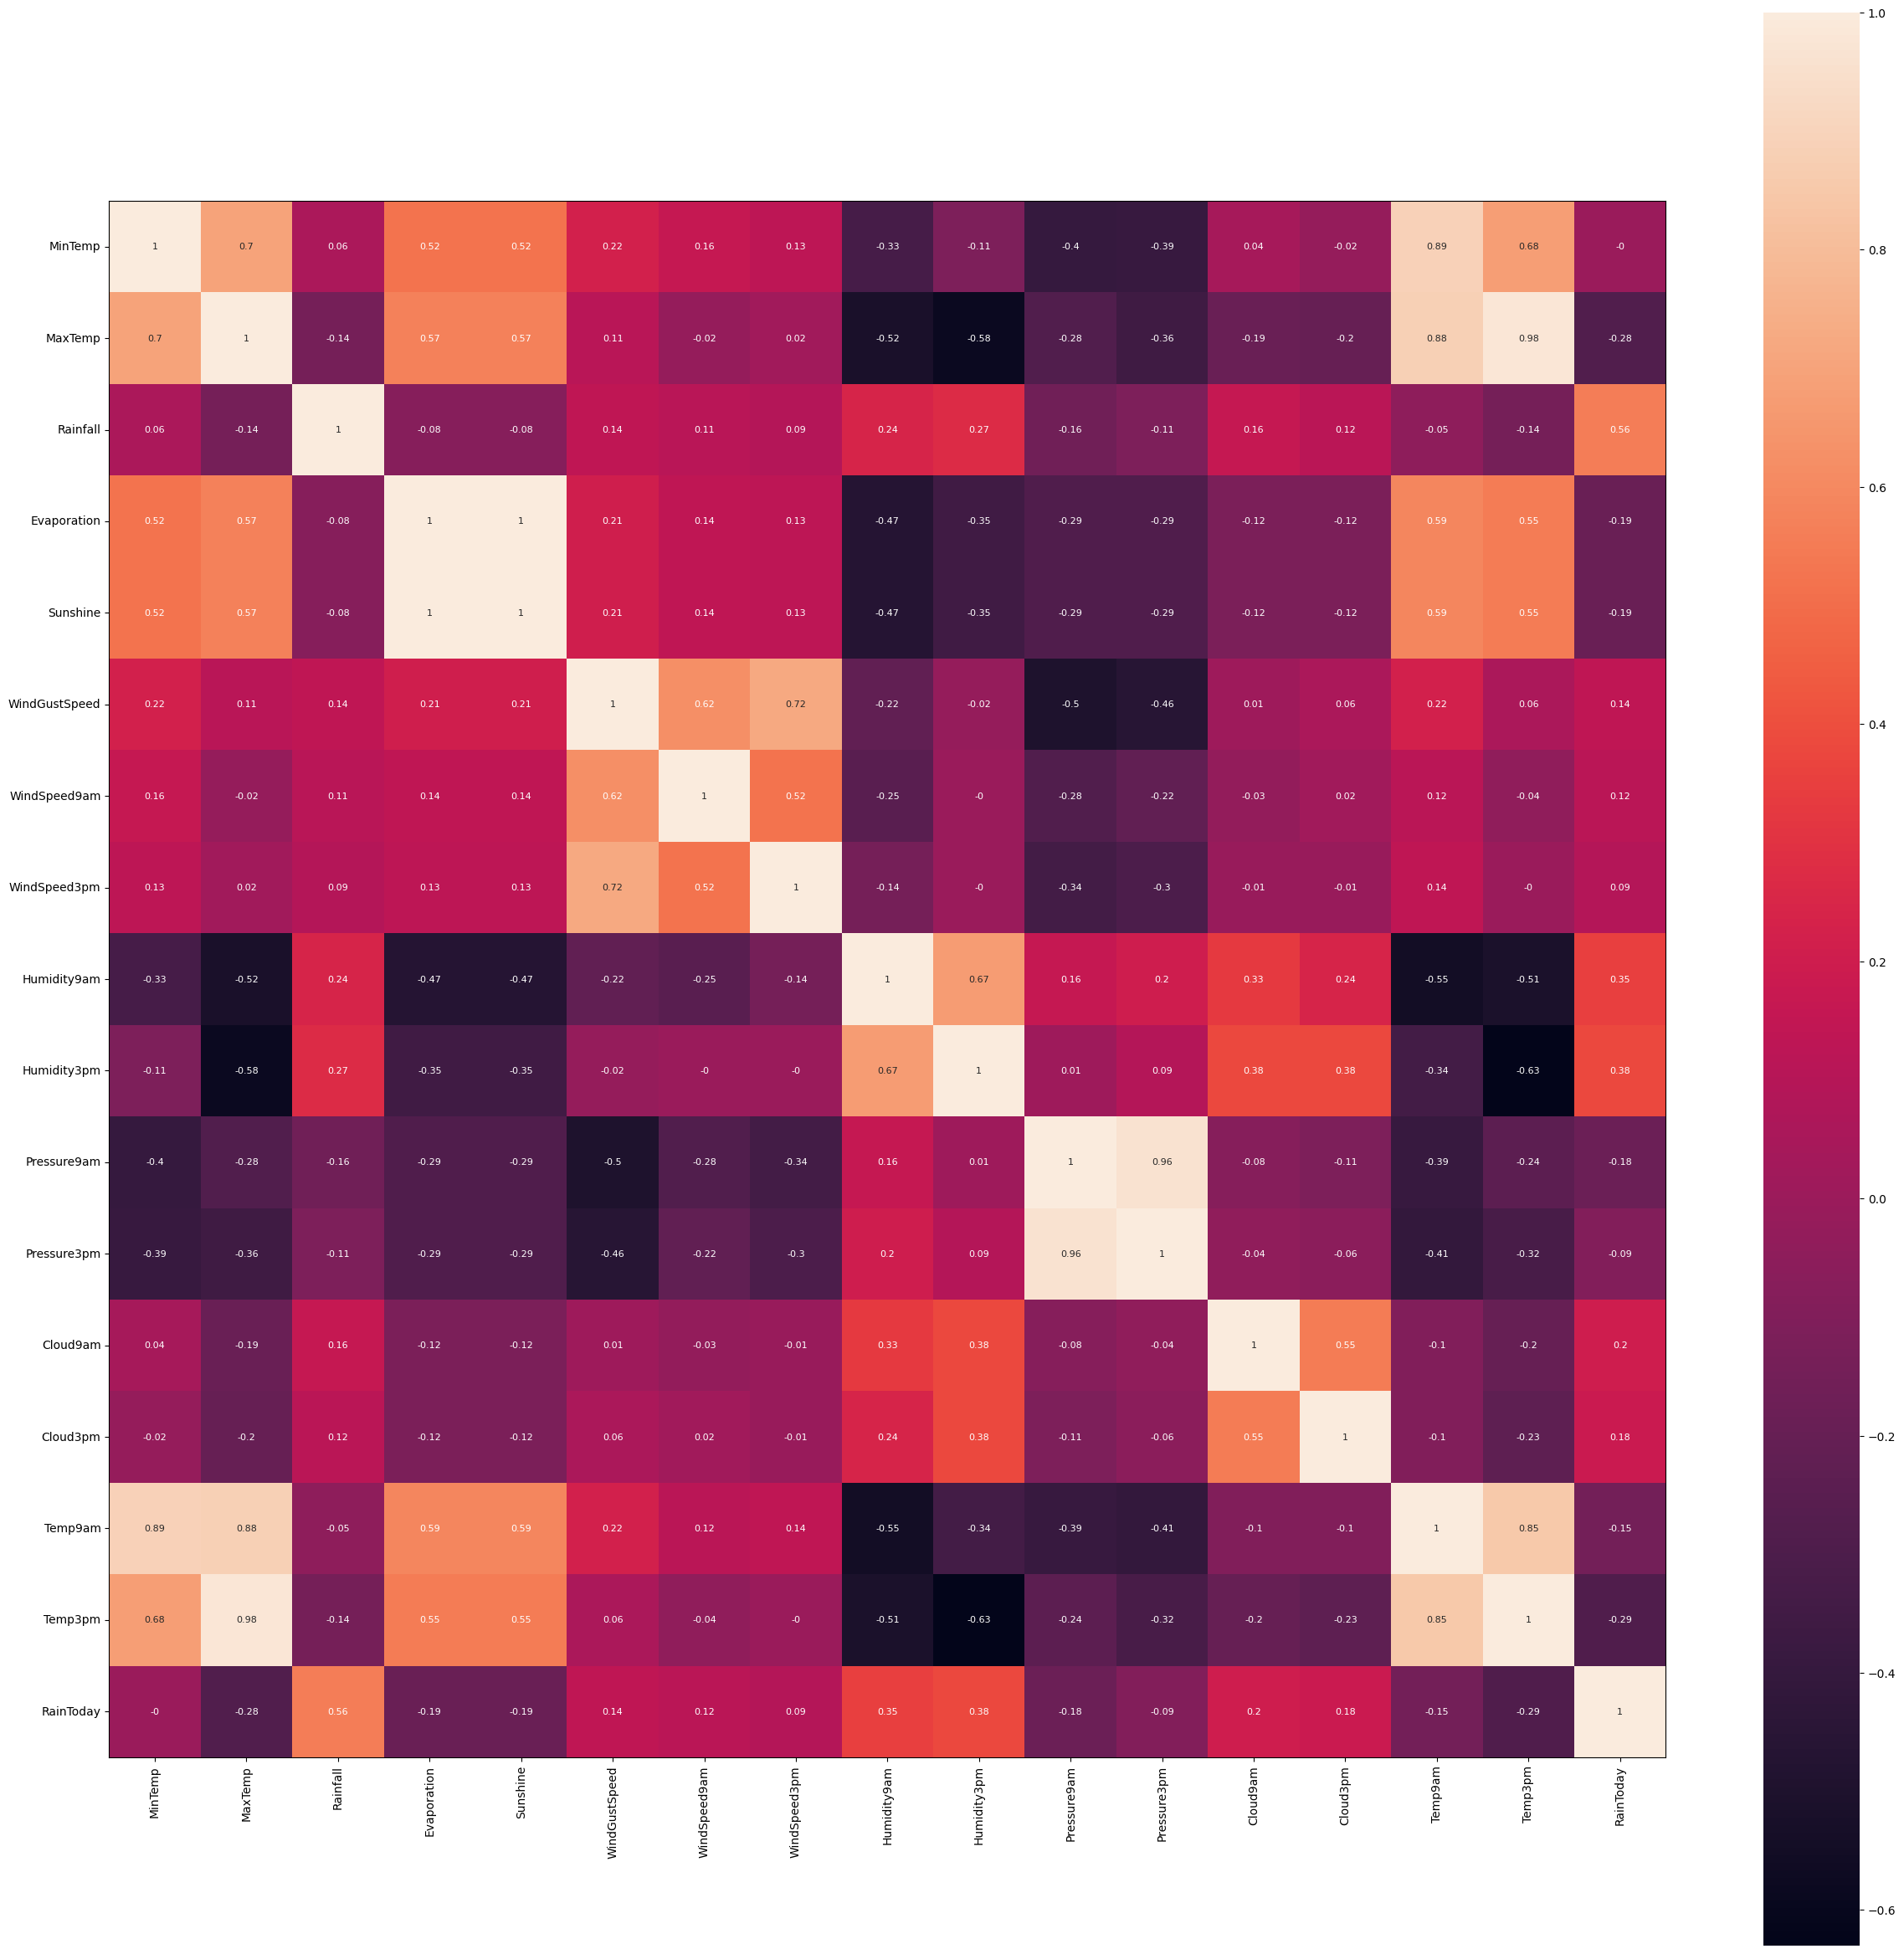

In [63]:
plt.figure(figsize=(30, 30))

heatmap = sns.heatmap(
    dataframe_regresion_X.corr().round(2),
    annot=True,
    square=True,
    annot_kws={'size': 8},  
)

for _, spine in heatmap.spines.items():
    spine.set_visible(True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

# Esta balanceado el dataset?

no ya que nuestra variable independiente (rainfalltomorrow) tiene muchos valores iguales a 0

<Axes: >

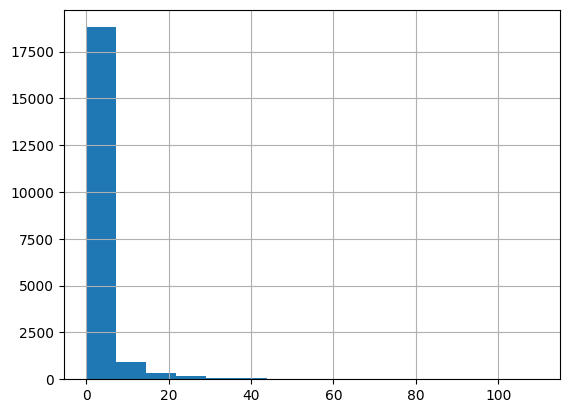

In [82]:
dataframe_regresion_Y.hist(bins=15)

# Normalizar

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

dataframe_regresion_X = scaler.fit_transform(dataframe_regresion_X)
dataframe_test_regresion_X = scaler.fit_transform(dataframe_test_regresion_X)


# Regresion Lineal simple

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
regresion = LinearRegression()
regresion.fit(dataframe_regresion_X, dataframe_regresion_Y)

LinearRegression()

# Handler de metricas para regresion

In [68]:
from math import sqrt
def errores(y_test, y_pred):
    print('R2:   %.2f' % r2_score(y_test, y_pred))
    print('MSE:  %.2f' % mean_squared_error(y_test, y_pred))
    print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))
    print('MAE:  %.2f' % mean_absolute_error(y_test, y_pred))
    print('MAPE: %.2f' % mean_absolute_percentage_error(y_test, y_pred))

In [69]:
y_pred_regresion = regresion.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_regresion)

R2:   0.20
MSE:  29.25
RMSE: 5.41
MAE:  2.71
MAPE: 4583551313770406.00


# Lasso regression

In [70]:
from sklearn.linear_model import LassoCV

In [71]:
lasso = LassoCV()
lasso.fit(dataframe_regresion_X, dataframe_regresion_Y)

LassoCV()

In [72]:
y_pred_lasso = lasso.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_lasso)

R2:   0.20
MSE:  29.20
RMSE: 5.40
MAE:  2.70
MAPE: 4553671269217261.00


# Ridge regression

In [73]:
from sklearn.linear_model import RidgeCV

In [74]:
rid = RidgeCV()
rid.fit(dataframe_regresion_X, dataframe_regresion_Y)

RidgeCV()

In [75]:
y_pred_ridge = rid.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_ridge)

R2:   0.20
MSE:  29.24
RMSE: 5.41
MAE:  2.70
MAPE: 4576587350036995.00


# ElasticNet

In [76]:
from sklearn.linear_model import ElasticNetCV

In [77]:
en = ElasticNetCV()
en.fit(dataframe_regresion_X, dataframe_regresion_Y)

ElasticNetCV()

In [78]:
y_pred_elastic = en.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_elastic)

R2:   0.20
MSE:  29.22
RMSE: 5.41
MAE:  2.70
MAPE: 4545283241034054.00


# Gradiente 

In [79]:
from sklearn.linear_model import SGDRegressor

In [80]:
grad = SGDRegressor(max_iter=1000)
grad.fit(dataframe_regresion_X, dataframe_regresion_Y)


SGDRegressor()

In [81]:
y_pred_grad = en.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_grad)

R2:   0.20
MSE:  29.22
RMSE: 5.41
MAE:  2.70
MAPE: 4545283241034054.00
